<a href="https://colab.research.google.com/github/seunghee0518/R_File/blob/main/R_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D_5%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%ED%98%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비선형함수 신경망모형(코사인함수(cos(4πx)))
* 대표적 비선형함수 cos함수 추정정

In [1]:
#패키지 설치
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



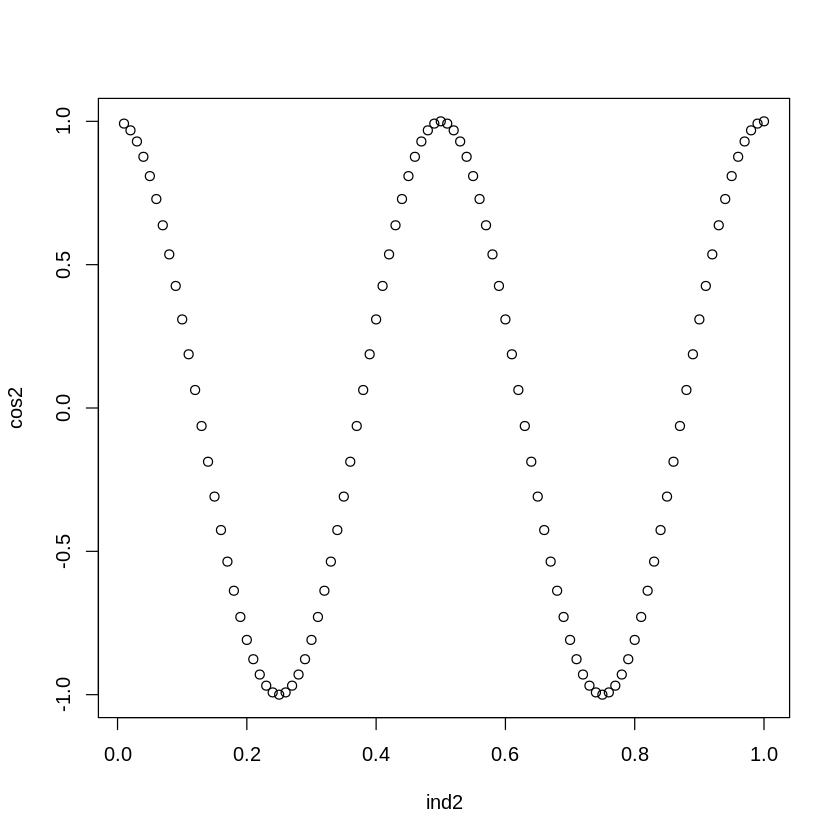

In [ ]:
#코사인함수 생성
set.seed(130)
ind1 = 1:100
ind2 = ind1/100
cos2 = cos(ind2*4*pi)
cdat = data.frame(cbind(ind2, cos2))
plot(cdat)

In [ ]:
#신경망모형 학습
cos2.nn = neuralnet(cos2 ~ ind2, data = cdat, hidden = 5, linear.output = T) #회귀문제이므로 T
plot(cos2.nn)

In [ ]:
#예측
#cos.pred = compute(cos2.nn, ind2)
#plot(ind1, cos.pred$net.result)
#lines(cos2)
ind2

[1] 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15
 [16] 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30
 [31] 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45
 [46] 0.46 0.47 0.48 0.49 0.50 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60
 [61] 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75
 [76] 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90
 [91] 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00

#보스턴하우징데이터(연속형변수 : 예측문제)
* 목표변수 : 주택가격의 중간값 medv
* 506개 관측치, 14개 변수
>
1. crim : 수치형 타우녈 1인당 범죄율
2. zn : 수치형 25,000평방피트 초과 거지지역비율
3. indus : 수치형 비소매상업지역 점유토지비율
4. chas : 범주형 찰스강에 대한 더미변수(경계위치1, 아니면0) (실제로 범주형이지만 수치형으로 인식)
5. nox : 수치형 10ppm당 농축 일산화질소
6. rm : 수치형 주택 1가구당 방의 평균개수
7. age : 수치형 1940년 이전에 건축된 소유자주택비율
8. dis : 수치형5개의 보스턴고용센터까지의 접근성지수
9. rad : 범주형 방사형 도로까지 접근성지수 (실제로 범주형이지만 수치형으로 인식)
10. tax : 수치형 10,000달러당 재산세율
11. ptratio : 수치형 타운별 학생/교사 비율
12. black : 수치형 타운별 흑인비율
13. lstat : 수치형 모집단의 하위계층의 비율
14. medv : 수치형 본인 소유의 주택가격
* chas, rad는 실제 범주형이지만 수치형으로 인식되 변환필요

In [ ]:
#패키지 가져오기
install.packages("neuralnet")
library(neuralnet)
library(MASS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [ ]:
#데이터 불러오기
bdat = Boston
#범주화는 신경망모형시 사용X
#데이터 가공(실제 범주형 데이터인데 수치형으로 인식 -> 범주화)
#bdat$chas = factor(bdat$chas) 
#bdat$rad = factor(bdat$rad)

In [ ]:
#bdat데이터의 열 중 max값 & min값
#2: 세로방향으로 max값 구하기(1 : 가로방향)
max1 = apply(bdat, 2, max) 
min1 = apply(bdat, 2, min)

#신경망에 사용하는 수치형 변수를 0~1사이의 값으로 바꾸기 : 표준화
sdat = scale(bdat, center = min1, scale = max1 - min1)
sdat = as.data.frame(sdat)
head(sdat)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


In [ ]:
#훈련/검증데이터 분리
set.seed(100) # 랜덤추출값에 라벨링해 실행할때마다 변동되는 것 방지
i = sample(1:nrow(bdat), round(0.5*nrow(bdat))) # 50% 랜덤추출
train.dat = sdat[i,]
test.dat = sdat[-i, ]

In [ ]:
#신경망 학습
#paste : 나열된 원소를 이어붙여서 결과값으로 제공
#collapse는 결과값이 두개 이상일 때, 각각의 결과값에 옵션을 주어 이어붙일 때 사용
n= names(train.dat)
form = as.formula(paste("medv ~ ", paste(n[!n %in% "medv"], collapse = " + ")))
nn1 = neuralnet(form, data = train.dat, hidden = c(5, 3), linear.output = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: scales

Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’”
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘reshape’

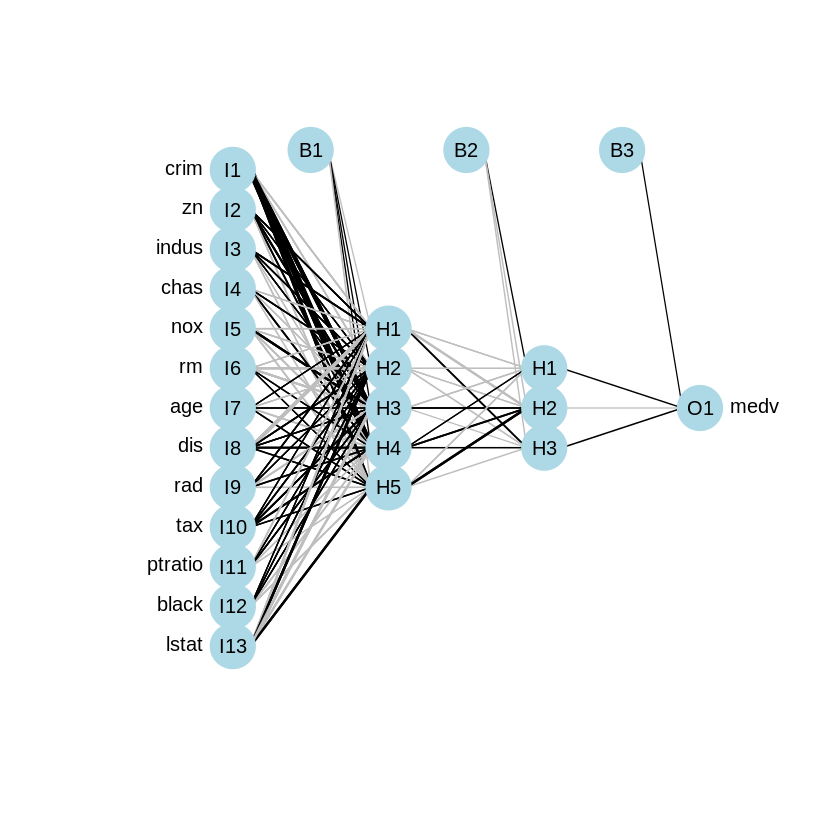

In [ ]:
install.packages("devtools")
library(devtools)
source('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
plot.nnet(nn1)

In [ ]:
#예측
pred.nn1 = compute(nn1, test.dat[,1:13])

#표준화시킨 값을 원래대로 환원
pred1 = pred.nn1$net.result*(max(bdat$medv)-min(bdat$medv))+min(bdat$medv)

In [ ]:
#예측평균제곱오차
PMSE.bdat = sum((bdat[-i, 14] - pred1)^2)/nrow(test.dat)
cat("PMSE : ", PMSE.bdat)

PMSE :  13.68262

#독일신용평가데이터(목표변수:범주형 -> 분류문제)
* 목표변수 : 신용등급
* 입력변수 : 그외 변수
>
1. check : 범주형, 자유예금형태(순서 범주)
2. duration : 수치형 기간 (수치)
3. history : 범주형 과거신용정보 (순서 범주)
4. porpose : 범주형 목적(범주형 중 명목)
5. credit : 수치형 신용대출금액 
6. savings : 범주형 저축예금/채권(순서 범주)
7. employment : 범주형 현직장 재직기간 (순서 범주)
8. installment : 수치형 가처분소득 대비 적금비율
9. personal : 범주형 결혼상황 및 성별(범주형 중 명목)
10. debtors : 범주형 여타 채부/채권(범주형 중 명목)
11. residence: 수치형 현 거주기간(실제는 범주형)
12. property : 재산 (순서 범주)
13. age : 수치형 나이 
14. others : 범주형 여타 적금 (순서 범주)
15. housing : 범주형 주택거주형태(범주형 중 명목)
16. numcredits : 수치형 해당 은행 신용계좌수(실제는 범주형)
17. job : 범주형 직업(범주형 중 명목)
18. residpeople : 수치형 부양가족수(실제는 범주형)
19. telephone : 범주형 전화소유 (순서 범주)
20. foreign : 범주형 외국인노동자 여부 (순서 범주)
21. y : 범주형 신용등급(양호/불량)
* 분류문제 : linear.output = F
* 1,000관측치, 7개 수치형, 13개 범주형
* 실제로 범주형인 수치형 변수는 변주형으로 변경해야됨(factor())
* 패키지에 따라 범주형 변수를 인식 못하는 경우 가변수로 변환
> 4, 9, 10, 15, 17번 변수 -> 범주형 중 명목형이므로 더미변수로 변환
> 순서가 있는 범주형 변수는 수치형으로 변환


* neuralent패키지 제약
* 명목형 변수를 적절하데 더미 변수로 생성하여 대체해줘야됨
* 순서가 있는 범주형 변수는 최근 R에서는 ordered함수로 순서형 으로 인식시켜줘야됨
* 순서형으로 인식한 후 수치형 변수로 변환시켜야됨

In [2]:
#데이터 가져오기
url_german = "https://raw.githubusercontent.com/seunghee0518/R_File/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A7%88%EC%9D%B4%EB%8B%9D/germandata.txt"
german = read.table(url_german, header=T)
head(german)

,check,duration,history,purpose,credit,savings,employment,installment,personal,debtors,⋯,property,age,others,housing,numcredits,job,residpeople,telephone,foreign,y
,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,⋯,A121,67,A143,A152,2,A173,1,A192,A201,good
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,⋯,A121,22,A143,A152,1,A173,1,A191,A201,bad
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,⋯,A121,49,A143,A152,1,A172,2,A191,A201,good
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,⋯,A122,45,A143,A153,1,A173,2,A191,A201,good
5,A11,24,A33,A40,4870,A61,A73,3,A93,A101,⋯,A124,53,A143,A153,2,A173,2,A191,A201,bad
6,A14,36,A32,A46,9055,A65,A73,2,A93,A101,⋯,A124,35,A143,A153,1,A172,2,A192,A201,good


In [3]:
#수치형이지만 범주형으로 인식되는 변수 factor화 : numcredits, residence, residenpeople
#factor -> numberic / 안할경우 -> integer임
german$numcredits = factor(german$numcredits)
german$residence = factor(german$residence)
german$residpeople = factor(german$residpeople)

In [4]:
#순서가 있는 범주형변수이자 명목형으로 인식되는 변수 ordered화
#순서가 잇는 범주로 인식 못하는 변수 - 순서형으로 변환
german$check = ordered(german$check)
german$history = ordered(german$history)
german$savings = ordered(german$savings)
german$employment = ordered(german$employment)
german$property = ordered(german$property)
german$others = ordered(german$others)
german$telephone = ordered(german$telephone)
german$foreign = ordered(german$foreign)

In [5]:
#사용패키지
install.packages("dummy")
library(dummy)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

dummy 0.1.3

dummyNews()



In [6]:
dvar = c(4, 9, 10, 15, 17) #명목형 변수
german2 = dummy(x = german[, dvar])
revar = c(10, 14, 17, 20, 24) # 중복변수 삭제(가변수 생성은 n-1개만 필요함으로)
german2 = german2[, -revar]
german2 = cbind(german[, -dvar], german2) #더미변수와 기존변수 결합


#순서가 있는 범주형 변수의 수치형 변수화
for(i in 1: ncol(german2)) if(!is.numeric(german2[, i])) german2[, i] = as.numeric(german2[, i])
german2$y = ifelse(german$y == 'good', 1, 0) # 목표변수 변환

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


* dummy()함수는 연속형변수에 사용시 더미변수를 만들어내지 않음
* 명목형 변수는 더미 변수를 많들어내나 순서가 있는 명목형 변수인지 범주형 변수인지 구분하지 않음

In [7]:
summary(german2)

     check          duration       history          credit         savings     
 Min.   :1.000   Min.   : 4.0   Min.   :1.000   Min.   :  250   Min.   :1.000  
 1st Qu.:1.000   1st Qu.:12.0   1st Qu.:3.000   1st Qu.: 1366   1st Qu.:1.000  
 Median :2.000   Median :18.0   Median :3.000   Median : 2320   Median :1.000  
 Mean   :2.577   Mean   :20.9   Mean   :3.545   Mean   : 3271   Mean   :2.105  
 3rd Qu.:4.000   3rd Qu.:24.0   3rd Qu.:5.000   3rd Qu.: 3972   3rd Qu.:3.000  
 Max.   :4.000   Max.   :72.0   Max.   :5.000   Max.   :18424   Max.   :5.000  
   employment     installment      residence        property    
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.000  
 1st Qu.:3.000   1st Qu.:2.000   1st Qu.:2.000   1st Qu.:1.000  
 Median :3.000   Median :3.000   Median :3.000   Median :2.000  
 Mean   :3.384   Mean   :2.973   Mean   :2.845   Mean   :2.358  
 3rd Qu.:5.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:3.000  
 Max.   :5.000   Max.   :4.000   Max.   :4.000   M

In [8]:
#훈련/검증 데이터 분리
set.seed(1000)
i = sample(1:nrow(german2), round(0.75*nrow(german2)))

#표준화
max.german = apply(german2, 2, max) #각 열별 최대값 
min.german = apply(german2, 2, min) #각 열별 최소값

gdat = scale(german2, center = min.german, scale = max.german - min.german)
gdat = as.data.frame(gdat)

train.german = gdat[i, ]
test.german = gdat[-i, ]

In [9]:
gn = names(german2)
f = as.formula(paste("y ~", paste(gn[!gn %in% "y"], collapse = " + ")))
g.nn1 = neuralnet(f, data = train.german, hidden = c(3, 2), linear.output = F)

In [10]:
plot(g.nn1)

In [13]:
#표준화
#dim : 행과 열의 개수 모두출략
#y값은 제외 y -> 16번째 열
pred.nn1 = compute(g.nn1, test.german[, c(1:15, 17:dim(german2)[2])]) # 전체 행, 열 : 1~15+17부터 끝
pred.nn2 = ifelse(pred.nn1$net.result>0.5, 1, 0)

#오분류율 :28%
sum(german2[-i, 16] != pred.nn2) / length(german2[-i, 16])

[1] 0.28